In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


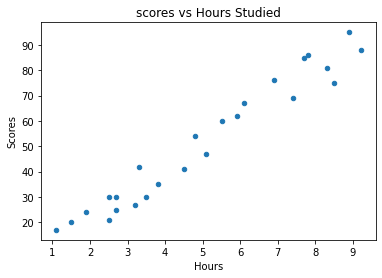

In [39]:
df = pd.read_csv('student_scores.csv')
print(df)
df.plot(kind='scatter', x='Hours', y='Scores', title='scores vs Hours Studied')
print(df.corr())

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()

In [51]:
temp1=[]
for i in X_train:
    temp1.append(i[0])
X_train_mod=np.array(temp1)
print(X_train_mod)

temp2=[]
for i in X_test:
    temp2.append(i[0])
X_test_mod=np.array(temp2)
print(X_test_mod)

[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
 8.9 4.5]
[1.5 3.2 7.4 2.5 5.9]


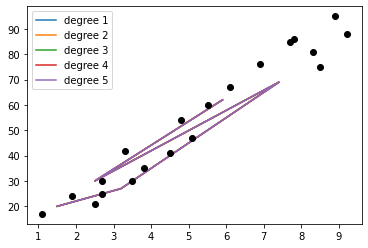

In [62]:
from sklearn import metrics
for deg in [1, 2, 3, 4, 5]:
    regressor.fit(np.vander(X_train_mod, deg + 1), y_train)
    y_pred = regressor.predict(np.vander(X_test_mod, deg + 1))
    plt.plot( X_test_mod,y_test, label='degree ' + str(deg));
    plt.legend(loc=2);
#     print(r2_score(y_test, y_pred))
plt.plot(X_train_mod, y_train, 'ok')

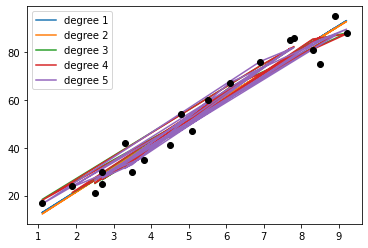

In [68]:
for deg in [1, 2, 3, 4, 5]:
    regressor.fit(np.vander(X_train_mod, deg + 1), y_train);
    y_lr = regressor.predict(np.vander(X_train_mod, deg + 1))
    plt.plot(X_train, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    #print r2_score(y, y_lr)
plt.plot(X_train, y_train, 'ok')

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

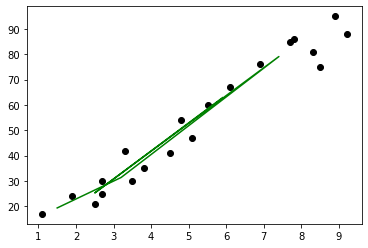

In [76]:
degree = 4
model = make_pipeline(PolynomialFeatures(degree), regressor)
model.fit(X_train, y_train)
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, model.predict(X_test), color='green')
# print("R Squared using built-in function: ", r2_score(y, model.predict(x)))